 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 6. MLP Basis**
# Section 2. 신경망의 구조

### _Objective_
1. 신경망의 기본적인 구조들에 대해 배워보도록 하겠습니다.<br>
2. 활성화 함수에 대해 배워보도록 하겠습니다. <br>
3. 순전파의 과정에 대해 배워보도록 하겠습니다.
  
╚═════════════════════════════════════════╝

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<br><br>

# \[ 1. 신경망의 구조 \]

----

----

> *신경망은 기본적으로 입력층, 은닉층, 출력층으로 구성되어 있습니다. *<br>

## 1. 입력층, 은닉층, 출력층
---

![Imgur](https://i.imgur.com/kg4JBzd.png)

* 모든 신경망에는 3가지 종류의 층을 가지고 있습니다. <br>
    * 입력 신호를 받는 Input Layer
    * 출력 값을 반환하는 Output Layer($\hat y$)
    * 중간 층인 Hidden Layer


XOR 문제에서 바라보면

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/254px_3gate_XOR.jpg)

* 입력 신호인 A,B는 Input Layer
* XOR 출력값은 Output Layer
* 중간 AND, OR 연산 출력값은 Hidden Layer로 구성되어 있습니다.

## 2. 신경망의 표기법
---

![Imgur](https://i.imgur.com/6JPsDg3.png)

신경망을 우리가 표시할 때에는 몇 가지 관례(Convention)이 존재합니다.<br>
논문이나 책의 저자 마다 약간씩 표기방법(Notation)이 다르지만,<br>
대체로 사용되고 있는 표기에 대해 논의하겠습니다.

### (1) Unit와 Layer
우리는 각 뉴런들 하나하나를 신경망에서는 Unit라고 부르고,<br>
각 층마다의 뉴런들의 집합을 Layer라고 부릅니다.

위의 신경망은 모두 3층으로 구성되어있지만, 가중치를 갖는 층은 2개 뿐이기 때문에<br>
보통 "2층 신경망"이라고 부릅니다.<br>

관례상 입력층은 0번째 층으로 표기하고, 입력층을 제외한 나머지 층의 갯수를 헤아립니다.

### (2) Node와 Layer의 표기법

각 Unit에는 
* "몇번째 층에서의", 
* "몇 번째의 Unit"

인지를 표기해야 합니다.

이를 위해 위첨자는 주로 "층의 번호"를 기록하고,<br>
아랫첨자는 주로 원소의 index를 입력합니다.



### (3) Weight(가중치)와 Bias(편향)의 표기법

각 Unit에서는 가중치와 편향이 존재합니다. 

![Imgur](https://i.imgur.com/nAN8Nkm.png)

Unit 별로 가중치와 편향이 존재하기 때문에, Node의 Notation처럼 표기하게 됩니다.

이 떄 주의해야 하는 것 중 하나는 유닛의 Weight는 단일 값이 아닌 벡터라는 것입니다.<br>
한 유닛의 Weight는 이전 층의 유닛들에 각각 존재하기 때문에,<br>
Weight 중 한 원소는 다음처럼 구성됩니다.

![Imgur](https://i.imgur.com/xSBmlUZ.png)

각 Weight의 원소 별 표기는 아래처럼 되어 있습니다.

![Imgur](https://i.imgur.com/f0BQTzh.png)

### (4) 각 Layer의 차원

위의 신경망에서 차원 수를 헤아려보면,

* 입력층 : $(x_1,x_2,x_3)$으로 3차원
* 은닉층 : $(a_1^{[1]},a_2^{[1]},a_3^{[1]},a_4^{[1]})$으로 4차원
* 출력층 : $a^{[2]}$으로 1차원


### (5) 각 Weight의 차원

각 유닛 별 가중치는 연결되어 있는 이전 층의 유닛수만큼 존재해야 합니다.

* $w^{[1]}$의 shape : (은닉층의 unit 수,입력층의 unit 수) = (4,3)
* $w^{[2]}$의 shape : (출력층의 unit 수,은닉층의 unit 수) = (1,4)

### (6) 각 bias의 차원

각 유닛 별 Bias는 하나씩 존재합니다.

* $b^{[1]}$의 shape : (은닉층의 unit 수) = (4)
* $b^{[2]}$의 shape : (출력층의 unit 수) = (1)

<br><br>

# \[ 2. 순전파 \]

----

----

> *순전파란 입력층부터 출력층까지 각 층을 거쳐가며 신호가 타고넘어가는 일련의 과정을 뜻합니다*<br>
> *모델이 가지고 있는 가중치를 가지고, 우리가 원하는 형태의 결과값을 반환하기 위한 과정입니다.*<br>


## 1. 유닛의 연산
---
* 유닛의 연산은 기본적으로 이전 Chapter에서 다룬 Logistic Classification과 매우 닮아 있습니다.<br>
* 로지스틱 회귀 모델은 아래의 두 단계로 이루어져 있습니다.<br>
$
z = w_0 + w_1x_1 + w_2x_2 + w_3x_3\\
a = \sigma(z) = \frac{1}{1+e^{-z}}
$

![Imgur](https://i.imgur.com/26G8oSL.png)

유닛의 연산도 로지스틱 회귀와 동일하게 두단계로 이루어집니다.

1. 로짓(z)를 계산하는 왼쪽 부분
2. 활성화함수($\sigma$)를 거치는 오른쪽 부분

### (1) 유닛의 로짓 값 구하기

은닉층의 유닛($z^{[1]}_1$)을 계산하기 위해서 <br>
우리는 가중치인 $W^{[1]}_1$과 bias인 $b^{[1]}_1$이 필요합니다.

$$
z^{[1]}_1 = W^{[1]}_1X + b^{[1]}_1
$$
이를 원소 별로 풀어서 본다면 아래와 같습니다.

$$
z^{[1]}_1 = \left[ w^{[1]}_{1,1}, w^{[1]}_{1,2},w^{[1]}_{1,3} \right]\cdot \left[x_1,x_2,x_3 \right]^T + b^{[1]}_1
$$

은닉층 모든 유닛을 원소 별로 풀어서 본다면 아래와 같습니다.

$$
z^{[1]}_1 = \left[ w^{[1]}_{1,1}, w^{[1]}_{1,2},w^{[1]}_{1,3} \right]\cdot \left[x_1,x_2,x_3 \right]^T + b^{[1]}_1\\
z^{[1]}_2 = \left[ w^{[1]}_{2,1}, w^{[1]}_{2,2},w^{[1]}_{2,3} \right]\cdot \left[x_1,x_2,x_3 \right]^T + b^{[1]}_2\\
z^{[1]}_3 = \left[ w^{[1]}_{3,1}, w^{[1]}_{3,2},w^{[1]}_{3,3} \right]\cdot \left[x_1,x_2,x_3 \right]^T + b^{[1]}_3\\
z^{[1]}_4 = \left[ w^{[1]}_{4,1}, w^{[1]}_{4,2},w^{[1]}_{4,3} \right]\cdot \left[x_1,x_2,x_3 \right]^T + b^{[1]}_4\\
$$

노드 수가 더 늘어나게 되면, 우리는 위와같이 표기하는 것이 어려워집니다.

그래서 주로 우리는 아래와 같이 Matrix로 표기하게 됩니다.
$$
\begin{bmatrix}
z^{[1]}_1\\
z^{[1]}_2\\
z^{[1]}_3\\
z^{[1]}_4
\end{bmatrix} = \begin{bmatrix}
w^{[1]}_{1,1}, w^{[1]}_{1,2},w^{[1]}_{1,3} \\
w^{[1]}_{2,1}, w^{[1]}_{2,2},w^{[1]}_{2,3} \\
w^{[1]}_{3,1}, w^{[1]}_{3,2},w^{[1]}_{3,3} \\
w^{[1]}_{4,1}, w^{[1]}_{4,2},w^{[1]}_{4,3} \\
\end{bmatrix} \cdot \begin{bmatrix}
x^{[1]}_1\\
x^{[1]}_2\\
x^{[1]}_3
\end{bmatrix} + \begin{bmatrix}
b^{[1]}_1\\
b^{[1]}_2\\
b^{[1]}_3\\
b^{[1]}_4
\end{bmatrix}
$$
----

---
$
z^{[1]} = \begin{bmatrix}
z^{[1]}_1\\
z^{[1]}_2\\
z^{[1]}_3\\
z^{[1]}_4
\end{bmatrix}
$
$
W^{[1]} = \begin{bmatrix}
w^{[1]}_{1,1}, w^{[1]}_{1,2},w^{[1]}_{1,3} \\
w^{[1]}_{2,1}, w^{[1]}_{2,2},w^{[1]}_{2,3} \\
w^{[1]}_{3,1}, w^{[1]}_{3,2},w^{[1]}_{3,3} \\
w^{[1]}_{4,1}, w^{[1]}_{4,2},w^{[1]}_{4,3} \\
\end{bmatrix}
$, 
$
X^{[1]} = \begin{bmatrix}
x^{[1]}_1\\
x^{[1]}_2\\
x^{[1]}_3
\end{bmatrix}
$, 
$
b^{[1]} = \begin{bmatrix}
b^{[1]}_1\\
b^{[1]}_2\\
b^{[1]}_3\\
b^{[1]}_4
\end{bmatrix}
$

---
$
z^{[1]}_1 = W^{[1]}_1X + b^{[1]}_1
$

와 같이 식이 정리되게 됩니다.

### (2) 활성화함수(Activation)를 통한 활성화값 구하기

딥러닝에서 가장 핵심이 되는 함수 중 하나가 바로 활성화함수입니다.<br>
활성화함수의 존재로 우리는 선형 함수 외, 비선형 모델을 적용할 수 있게 되었습니다.

로지스틱회귀에서의 비선형 함수는 로지스틱(sigmoid) 함수입니다.
$$
logistic(z) = \frac{1}{1+e^{-z}}
$$

In [2]:
real_values = np.linspace(-10,10,100)
logistics = np.array([1/(1+np.exp(-value)) for value in real_values])

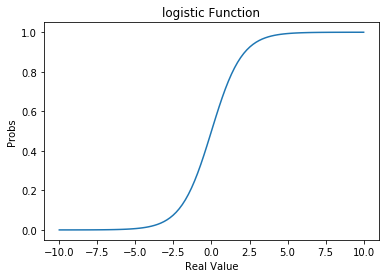

In [3]:
plt.plot(real_values, logistics)
plt.title("logistic Function")
plt.xlabel('Real Value')
plt.ylabel('Probs')
plt.show()

각 유닛의 출력값은 로짓값($z$)을 받아 활성화 함수를 거쳐 나오게 됩니다.
$$
a^{[1]}_1= \sigma(z^{[1]}_1)
$$

각 층은 유닛 별로 활성화 함수를 거치게 됩니다.

$
\begin{bmatrix}
a^{[1]}_1\\
a^{[1]}_2\\
a^{[1]}_3\\
a^{[1]}_4
\end{bmatrix} = \begin{bmatrix}
\sigma(z^{[1]}_1)\\
\sigma(z^{[1]}_2)\\
\sigma(z^{[1]}_3)\\
\sigma(z^{[1]}_4)
\end{bmatrix}
$

위의 수식도 행렬로 표현하면 아래처럼 요약할 수 있습니다.

$a^{[1]}=\sigma(z^{[1]})$

## 2. 순전파 연산
---
* 입력값은 각층의 유닛을 타고 로짓과 활성화함수를 거쳐 출력값으로 나오게 됩니다.<br>
* 예제를 풀면서 값이 어떻게 전파되어 가는지 배워보도록 하겠습니다.

![Imgur](https://i.imgur.com/nyrGvdv.png)

### (1) 값 정의하기
신경망 내 모든 값들은 기본적으로 행렬로 처리합니다.

In [4]:
x = np.array([[0.3],
              [0.7]])

# 은닉층의 weight와 bias
w1 = np.array([[0.2,-0.3],
              [-0.4,0.6]])
b1 = np.array([[0.4],
               [0.1]])

# 출력층의 weight와 bias
w2 = np.array([[0.8,0.5]])
b2 = np.array([[0.3]])

print("x의 shape  : {}".format(x.shape))
print("w1의 shape : {}".format(w1.shape))
print("b1의 shape : {}".format(b1.shape))
print("w2의 shape : {}".format(w2.shape))
print("b2의 shape : {}".format(b2.shape))

x의 shape  : (2, 1)
w1의 shape : (2, 2)
b1의 shape : (2, 1)
w2의 shape : (1, 2)
b2의 shape : (1, 1)


### (2) 은닉층 계산하기 

In [5]:
z1 = np.matmul(w1,x) + b1 # logit 계산하기
z1

array([[0.25],
       [0.4 ]])

In [6]:
a1 = 1 / (1+np.exp(-z1)) # sigmoid 적용하기
a1

array([[0.5621765 ],
       [0.59868766]])

### (3) 출력층 계산하기

In [7]:
z2 = np.matmul(w2,a1) + b2 # Logit 계산하기
z2

array([[1.04908503]])

In [8]:
a2 = 1/(1+np.exp(-z2)) # 최종 출력값 산출하기
a2

array([[0.74059916]])

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/29

---